In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [43]:
data_x=pd.read_csv('Movie_collection_Independent.csv')
data_y=pd.read_csv('Movie_collection_Target.csv')

In [44]:
data_x.head()

,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available,Genre_Thriller,Genre_Drama,Genre_Comedy
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,1,1,0,0
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,0,0,0,1
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,0,0,1,0


In [45]:
data_y.head()

,Collection
0,2.266667
1,2.106667
2,2.980000
3,2.893333
4,3.080000


In [46]:
from sklearn.model_selection import train_test_split as tts
X_train_full,X_test,Y_train_full,Y_test=tts(data_x,data_y,random_state=42)
X_train,X_valid,Y_train,Y_valid=tts(X_train_full,Y_train_full,random_state=42)

In [47]:
data_x.dtypes

Marketin_expense       float64
Production_expense     float64
Multiplex_coverage     float64
Budget                 float64
Movie_length           float64
Lead_ Actor_Rating     float64
Lead_Actress_rating    float64
Director_rating        float64
Producer_rating        float64
Critic_rating          float64
Trailer_views            int64
Time_taken             float64
Twitter_hastags        float64
Avg_age_actors           int64
Num_multiplex            int64
3D_available             int64
Genre_Thriller           int64
Genre_Drama              int64
Genre_Comedy             int64
dtype: object

In [48]:
X_test_full.shape

(127, 19)

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [58]:
model=keras.models.Sequential([
    keras.layers.Dense(30,activation='relu',input_shape=[19]),
    keras.layers.Dense(30,activation='relu'),
    keras.layers.Dense(1)
])

In [65]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.SGD(learning_rate=1e-2),metrics=['mae'])

In [66]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                600       
                                                                 
 dense_10 (Dense)            (None, 30)                930       
                                                                 
 dense_11 (Dense)            (None, 1)                 31        
                                                                 
Total params: 1,561
Trainable params: 1,561
Non-trainable params: 0
_________________________________________________________________


In [67]:
checkpoint_cb=keras.callbacks.ModelCheckpoint("early_stop_model.h5",save_best_only=True)

In [68]:
early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [69]:
model_history=model.fit(X_train,Y_train,epochs=100,validation_data=(X_valid,Y_valid))

Epoch 1/100
9/9 [==============================] - 0s 9ms/step - loss: 0.1325 - mae: 0.2913 - val_loss: 0.1989 - val_mae: 0.3632
Epoch 2/100
9/9 [==============================] - 0s 4ms/step - loss: 0.1252 - mae: 0.2822 - val_loss: 0.1860 - val_mae: 0.3497
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1197 - mae: 0.2729 - val_loss: 0.1745 - val_mae: 0.3361
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1151 - mae: 0.2676 - val_loss: 0.1693 - val_mae: 0.3293
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1098 - mae: 0.2612 - val_loss: 0.1652 - val_mae: 0.3245
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 0.1062 - mae: 0.2552 - val_loss: 0.1583 - val_mae: 0.3157
Epoch 7/100
9/9 [==============================] - 0s 2ms/step - loss: 0.1047 - mae: 0.2517 - val_loss: 0.1542 - val_mae: 0.3096
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0997 - mae: 0.2470 - val

9/9 [==============================] - 0s 3ms/step - loss: 0.0524 - mae: 0.1707 - val_loss: 0.1216 - val_mae: 0.2589
Epoch 65/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0521 - mae: 0.1694 - val_loss: 0.1204 - val_mae: 0.2569
Epoch 66/100
9/9 [==============================] - 0s 2ms/step - loss: 0.0519 - mae: 0.1695 - val_loss: 0.1197 - val_mae: 0.2556
Epoch 67/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0511 - mae: 0.1691 - val_loss: 0.1218 - val_mae: 0.2592
Epoch 68/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0512 - mae: 0.1687 - val_loss: 0.1211 - val_mae: 0.2580
Epoch 69/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0508 - mae: 0.1674 - val_loss: 0.1209 - val_mae: 0.2579
Epoch 70/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0503 - mae: 0.1665 - val_loss: 0.1204 - val_mae: 0.2571
Epoch 71/100
9/9 [==============================] - 0s 3ms/step - loss: 0.0506 - mae: 0.1678 - val_loss

In [70]:
model_history.history

{'loss': [0.13254548609256744,
  0.12521791458129883,
  0.11969617754220963,
  0.11511392891407013,
  0.10984539240598679,
  0.10622232407331467,
  0.10469022393226624,
  0.09970207512378693,
  0.09874477237462997,
  0.09700105339288712,
  0.09398482739925385,
  0.09368006139993668,
  0.09044146537780762,
  0.08999403566122055,
  0.08704027533531189,
  0.08574192970991135,
  0.08397596329450607,
  0.08391710370779037,
  0.08212171494960785,
  0.08120672404766083,
  0.07962435483932495,
  0.07880055159330368,
  0.07787587493658066,
  0.07675540447235107,
  0.07560721039772034,
  0.07419590651988983,
  0.07358843088150024,
  0.07346946746110916,
  0.07240133732557297,
  0.07178623229265213,
  0.0698685273528099,
  0.07056097686290741,
  0.06851493567228317,
  0.06787587702274323,
  0.0672435462474823,
  0.06613789498806,
  0.06577856093645096,
  0.06474100053310394,
  0.06420622766017914,
  0.06392441689968109,
  0.06341277807950974,
  0.06272457540035248,
  0.062120430171489716,
  0.061

In [71]:
mae_test=model.evaluate(X_test,Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 4.1290 - mae: 0.4993


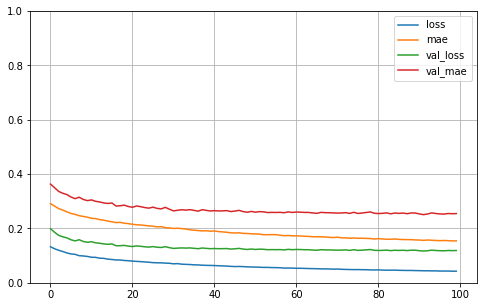

In [72]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)  #To set y-axis between 0 and 1
plt.show()

In [73]:
X_new=X_test[0:5]

In [74]:
model_pred=model.predict(X_new)

In [76]:
model_pred

array([[2.155449 ],
       [2.8959281],
       [1.9592664],
       [2.2406156],
       [1.9730785]], dtype=float32)